In [23]:
import datetime
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
%matplotlib inline


import logging

logging.basicConfig(level=logging.INFO)

In [24]:
%load_ext autoreload
%autoreload 2
import c14
import c14.models.liver
import c14.models.minimal
import c14.corner


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Models

In [26]:
c14.models.liver.models_list

[c14.models.liver.R,
 c14.models.minimal.POP1q,
 c14.models.minimal.POP1,
 c14.models.liver.POP2]

In [27]:
np.seterr(all='ignore')
results= dict()
NUM=0
for mm in c14.models.liver.models_list:
    m = mm()
    path = '/scratch/hepato/'+m.__class__.__name__+'_'+str(NUM) + '.pickle'
    try:
        with open(path, 'rb') as handle:
            res = pickle.load(handle)
    except FileNotFoundError:
        print(m.__class__.__name__,path)
        continue
    results[m.__class__.__name__] = {'res':res,'m':m}

ERROR:c14.models.base:Default logparas missing. 
ERROR:c14.models.base:No linparas -> assuming all are logparas. 
ERROR:c14.models.base:Default linparas missing. Assuming all are logparas
ERROR:c14.models.base:Default parameters missing sigma added automatikcally with limits 0,0.2
ERROR:c14.models.base:Default parameters missing sigma added automatikcally with limits 0,0.2
ERROR:c14.models.base:Default logparas missing. 
ERROR:c14.models.base:No linparas -> assuming all are logparas. 
ERROR:c14.models.base:Default linparas missing. Assuming all are logparas
ERROR:c14.models.base:Default parameters missing sigma added automatikcally with limits 0,0.2
ERROR:c14.models.base:Default parameters missing sigma added automatikcally with limits 0,0.2


In [28]:
print(results.keys())

dict_keys(['R', 'POP1q', 'POP1', 'POP2'])


In [29]:
import arviz as az
burnin=1000
age = None
remove_stuck=True
for n,v in results.items():
    v['pe'] = c14.tools.find_point_estimate(v['res'],v['m'])
    v['azdata'],v['azdata_names'] = c14.tools.convert_to_arviz(v['res'],v['m'],burnin,remove_stuck=remove_stuck,iparas_time=age,phy_space=False)
    chsck = c14.tools.run_convergence_checks(v['azdata'])
    print(n)
    for i in chsck:
        print(i)
    print('\n')

3  chains are stuck
R
INFO: The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
WARN: The number of effective samples is smaller than 10% for some parameters.


2  chains are stuck
POP1q
WARN: The number of effective samples is smaller than 10% for some parameters.


2  chains are stuck
POP1
WARN: The number of effective samples is smaller than 10% for some parameters.


1  chains are stuck
POP2
INFO: The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
WARN: The number of effective samples is smaller than 10% for some parameters.




# model compression

In [14]:
mc = az.compare({n:v['azdata'] for n,v in results.items()},ic='loo')
mc

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
R,0,-45.9028,1.28419,0,0.543827,3.40783,0,False,deviance
POP2,1,-43.7943,1.14227,2.1085,0.192993,4.58366,2.35026,False,deviance
POP1,2,-43.3044,1.00382,2.59841,0.155112,4.52679,2.39497,False,deviance
POP1q,3,-42.4812,1.25317,3.42163,0.108068,4.52193,2.55319,False,deviance


# Posterior plot

3  chains are stuck
R
INFO: The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
WARN: The number of effective samples is smaller than 10% for some parameters.


2  chains are stuck
POP1q
WARN: The number of effective samples is smaller than 10% for some parameters.


2  chains are stuck
POP1
WARN: The number of effective samples is smaller than 10% for some parameters.


1  chains are stuck
POP2
INFO: The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
WARN: The number of effective samples is smaller than 10% for some parameters.






Attaching package: ‘gplots’



    lowess


/home/julian/pythonenv/c14/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


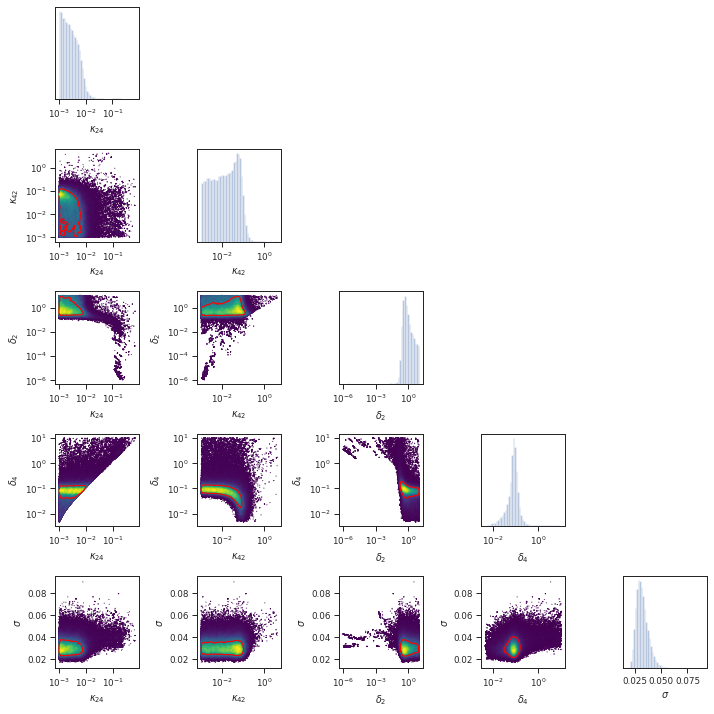

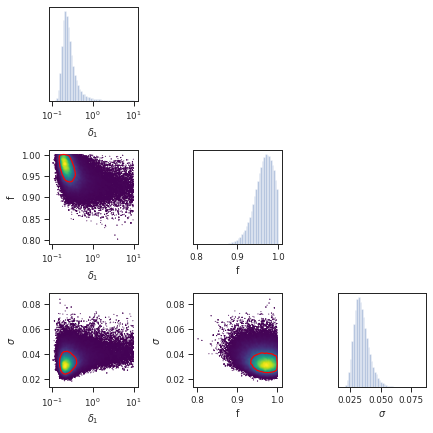

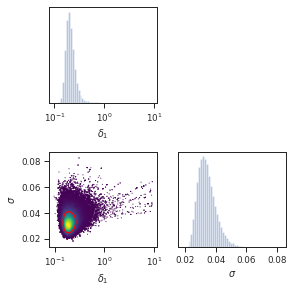

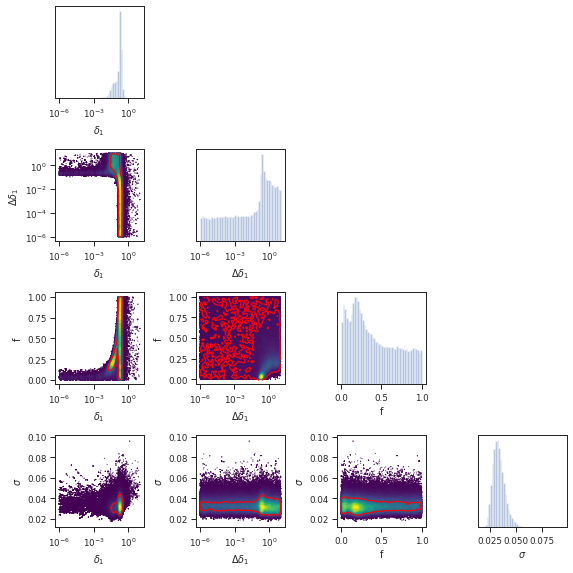

In [17]:
import arviz as az
burnin=1000
age = None
remove_stuck=True
for n,v in results.items():
    v['pe'] = c14.tools.find_point_estimate(v['res'],v['m'])
    v['azdata'],v['azdata_names'] = c14.tools.convert_to_arviz(v['res'],v['m'],burnin,remove_stuck=remove_stuck,iparas_time=age,phy_space=False)
    chsck = c14.tools.run_convergence_checks(v['azdata'])
    print(n)
    for i in chsck:
        print(i)
    print('\n')
    
from matplotlib import rcParams,rc
import seaborn as sb
from mpl_toolkits.axes_grid1 import make_axes_locatable
fonts = 1
sb.set(context="paper",style='ticks',font_scale=fonts)
para_rename={'lambda_':r"$\delta_1$",'dlambda':r"$\Delta\delta_1$",'sigma':r"$\sigma$",
            'kappa24':r"$\kappa_{24}$",'kappa42':r"$\kappa_{42}$",
             'delta2':r"$\delta_2$",'delta4':r"$\delta_4$",
            'f':r"f",'lambda1':r"$\delta_1$"}
for n,v in results.items():  
    c14.corner.corner_R(v['azdata'].posterior.a.values,
                   v['m'].parameter_names,burnin=0,point_estimate=None,rename=para_rename,
                     logparas=v['m'].logparas)    
    f = plt.gcf()
    f.show();
    #f.suptitle('hepato ' + n,fontsize=30)
    f.savefig('hepato'+n+'.png',dpi=600)


/home/julian/pythonenv/c14/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


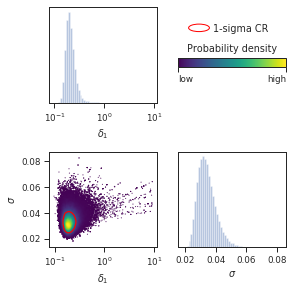

In [18]:
import matplotlib as mpl
import matplotlib.patches as patches
para_rename={'lambda_':r"$\delta_1$",'dlambda':r"$\Delta\delta_1$",'sigma':r"$\sigma$",
            'kappa24':r"$\kappa_{24}$",'kappa42':r"$\kappa_{42}$",
             'delta2':r"$\delta_2$",'delta4':r"$\delta_4$",
            'f':r"f",'lambda1':r"$\delta_1$"}
for n,v in results.items():  
    if n!='POP1':
        continue
    ttt=c14.corner.corner_R(v['azdata'].posterior.a.values,
                   v['m'].parameter_names,burnin=0,point_estimate=None,rename=para_rename,
                     logparas=v['m'].logparas)    
    f = plt.gcf()
    f.show();
    bbax0 = f.get_axes()[0].get_position()
    bbax3 = f.get_axes()[2].get_position()

    axL=plt.axes([bbax0.x0+bbax0.width, bbax0.y0+0.05,  1-(bbax0.x0+bbax0.width), 0.25], frameon=False, xticks=[],yticks=[])
    axL.set_xlim((0,1))
    axL.set_ylim((0,1))
    ellipse = patches.Ellipse(xy=(0.3,0.8), height=0.1, width=0.15, angle=0 ,      edgecolor='red', fc='None', lw=1)
    axL.text(0.4, 0.75, "1-sigma CR")
    axL.add_patch(ellipse)
    axC=plt.axes([bbax3.x0, bbax0.y0+0.12,bbax3.width,0.03], frameon=True)
    norm = mpl.colors.Normalize(vmin=0,vmax=1)
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm,cax=axC,orientation='horizontal')
    cbar.set_ticks([0,1])
    cbar.set_ticklabels(['low','high'])
    axC.set_title('Probability density')
    axC.xaxis.get_major_ticks()[0].label1.set_horizontalalignment('left')
    axC.xaxis.get_major_ticks()[1].label1.set_horizontalalignment('right')

    plt.draw()
    #f.suptitle('hepato ' + n,fontsize=30)
    f.savefig('hepato'+n+'_l.png',dpi=600)
    

In [9]:
def median_sd(x):
     median = np.percentile(x, 50)
     sd = np.sqrt(np.mean((x-median)**2))
     return sd
func_dict = {
     "std": np.std,
     "median_std": median_sd,
     "percentile.1585": lambda x: np.percentile(x, 15.85),
     "median": lambda x: np.percentile(x, 50),
     "percentile.8415": lambda x: np.percentile(x, 84.15),
}

In [10]:
n,v='R',results['R']
all_times=[]
#ages=[0,10,20,30,40,50,60,70,80]
ages = [25]
#ages=[20,60]
m = eval('c14.models.liver.'+n+'()')
for age in ages:
    print(age)
    burnin=1000
    remove_stuck=True
    azdata,azdata_names = c14.tools.convert_to_arviz(v['res'],v['m'],burnin,remove_stuck=remove_stuck,iparas_time=age)
    summary = az.summary(azdata,round_to=8,credible_interval=0.683,stat_funcs=func_dict)
    summary.index = azdata_names
    real_median = {pn:summary.loc[pn,'median'] for pn in m.parameter_names}
    m.set_parameters_phy(real_median)
    real_median.update(m.calc_implicit_parameters(age))
    summary['real_median'] = pd.Series(real_median)
    all_times.append(summary)
df = pd.concat(all_times)
df.index = pd.MultiIndex.from_product([ages,azdata_names],names=['time','para'])


ERROR:c14.models.base:Default logparas missing. 
ERROR:c14.models.base:No linparas -> assuming all are logparas. 
ERROR:c14.models.base:Default linparas missing. Assuming all are logparas
ERROR:c14.models.base:Default parameters missing sigma added automatikcally with limits 0,0.2


25
3  chains are stuck


In [11]:
df2 = df[['real_median','hpd_15.85%','hpd_84.15%']].unstack().rename(columns={'hpd_15.85%':'lower','hpd_84.15%':'upper'})
df_new=df2.copy()
cols = df_new.columns
new_cols = [(i2,i1) for i1,i2 in cols]
df_new.columns=pd.MultiIndex.from_tuples(new_cols)
df_new


,delta2,delta4,f22,f24,f42,f44,kappa24,kappa42,lambda2,lambda4,...,r2,r4,ratio_f,ratio_kappa,ratio_r,rf22,rf24,rf42,rf44,sigma
,real_median,real_median,real_median,real_median,real_median,real_median,real_median,real_median,real_median,real_median,...,upper,upper,upper,upper,upper,upper,upper,upper,upper,upper
time,,,,,,,,,,,,,,,,,,,,,
25,0.852018,0.079721,0.743739,0.002231,0.003153,0.011312,0.002536,0.013088,0.848131,0.107,...,1.751652,0.122608,3.318912,12.117182,0.214826,0.999943,0.236062,0.008479,0.950965,0.035255


In [ ]:
from multiprocessing import Pool
import arviz as az

def calc_iparas(el):
    n,v=el
    all_times=[]
    #ages=[0,10,20,30,40,50,60,70,80]
    ages = np.linspace(0,80,41)
    #ages=[20,60]
    m = eval('c14.models.liver.'+n+'()')
    for age in ages:
        print(age)
        burnin=1000
        remove_stuck=True
        azdata,azdata_names = c14.tools.convert_to_arviz(v['res'],v['m'],burnin,remove_stuck=remove_stuck,iparas_time=age)
        summary = az.summary(azdata,round_to=8,credible_interval=0.683,stat_funcs=func_dict)
        summary.index = azdata_names
        real_median = {pn:summary.loc[pn,'median'] for pn in m.parameter_names}
        m.set_parameters_phy(real_median)
        real_median.update(m.calc_implicit_parameters(age))
        summary['real_median'] = pd.Series(real_median)
        all_times.append(summary)
    df = pd.concat(all_times)
    df.index = pd.MultiIndex.from_product([ages,azdata_names],names=['time','para'])
    return {n:df}

with Pool(3) as p:
    res = p.map(calc_iparas,list(results.items()))
    
ALL = dict()
for i in res:
    ALL.update(i)
for n,v in ALL.items():
    results[n]['allparas'] = v
    with pd.HDFStore('final_v3_hepa'+n+'_'+str(NUM)+'.pandas') as st:
        st['df'] = v

ERROR:c14.models.base:Default logparas missing. 
ERROR:c14.models.base:No linparas -> assuming all are logparas. 
ERROR:c14.models.base:Default linparas missing. Assuming all are logparas
ERROR:c14.models.base:Default parameters missing sigma added automatikcally with limits 0,0.2


0.0
3  chains are stuck


ERROR:c14.models.base:Default parameters missing sigma added automatikcally with limits 0,0.2


0.0
2  chains are stuck


ERROR:c14.models.base:Default logparas missing. 
ERROR:c14.models.base:No linparas -> assuming all are logparas. 
ERROR:c14.models.base:Default linparas missing. Assuming all are logparas
ERROR:c14.models.base:Default parameters missing sigma added automatikcally with limits 0,0.2


0.0
2  chains are stuck
2.0
2  chains are stuck
2.0
2  chains are stuck
4.0
2  chains are stuck
6.0
2  chains are stuck
4.0
2  chains are stuck
8.0
2  chains are stuck
10.0
2  chains are stuck
6.0
2  chains are stuck
12.0
2  chains are stuck
14.0
2  chains are stuck
8.0
2  chains are stuck
16.0
2  chains are stuck
10.0
2  chains are stuck
18.0
2  chains are stuck
20.0
2  chains are stuck
12.0
2  chains are stuck
22.0
2  chains are stuck
24.0
2  chains are stuck
14.0
2  chains are stuck
26.0
2  chains are stuck
28.0
2  chains are stuck
16.0
2  chains are stuck
30.0
2  chains are stuck
32.0
2  chains are stuck
18.0
2  chains are stuck
34.0
2  chains are stuck
20.0
2  chains are stuck
36.0
2  chains are stuck
38.0
2  chains are stuck
22.0
2  chains are stuck
40.0
2  chains are stuck
42.0
2  chains are stuck
24.0
2  chains are stuck
44.0
2  chains are stuck
46.0
2  chains are stuck
26.0
2  chains are stuck
48.0
2  chains are stuck
28.0
2  chains are stuck
50.0
2  chains are stuck
52.0
2  c

ERROR:c14.models.base:Default parameters missing sigma added automatikcally with limits 0,0.2


0.0
1  chains are stuck
48.0
2  chains are stuck
2.0
1  chains are stuck
50.0
2  chains are stuck
52.0
2  chains are stuck
4.0
1  chains are stuck
54.0
2  chains are stuck
6.0
56.0
2  chains are stuck
1  chains are stuck
58.0
2  chains are stuck
8.0
1  chains are stuck
60.0
2  chains are stuck
62.0
2  chains are stuck
10.0
1  chains are stuck
64.0
2  chains are stuck
12.0
1  chains are stuck
66.0
2  chains are stuck
68.0
2  chains are stuck
14.0
1  chains are stuck
70.0
2  chains are stuck
16.0
1  chains are stuck
72.0
2  chains are stuck
74.0
2  chains are stuck
18.0
1  chains are stuck
76.0
2  chains are stuck
78.0
2  chains are stuck
20.0
1  chains are stuck
80.0
2  chains are stuck
22.0
1  chains are stuck
24.0
1  chains are stuck
26.0
1  chains are stuck
28.0
1  chains are stuck
30.0
1  chains are stuck
32.0
1  chains are stuck
34.0
1  chains are stuck
36.0
1  chains are stuck
38.0
1  chains are stuck
40.0
1  chains are stuck
42.0
1  chains are stuck
44.0
1  chains are stuck
46.0


In [12]:
for n,v in results.items():
    with pd.HDFStore('final_v3_hepa'+n+'_'+str(NUM)+'.pandas') as st:
         df= st['df']
    v['allparas'] = df

In [18]:
excel_writer = pd.ExcelWriter('hepatocyte_final_v3.xlsx')
for n,v in results.items():
    df = v['allparas'][['real_median','hpd_15.85%','hpd_84.15%']].unstack().rename(columns={'hpd_15.85%':'lower','hpd_84.15%':'upper'})
    df_new=df.copy()
    cols = df_new.columns
    new_cols = [(i2,i1) for i1,i2 in cols]
    df_new.columns=pd.MultiIndex.from_tuples(new_cols)
    df_new=df_new.reindex(sorted(df_new.columns), axis=1)
    
    df_new.to_excel(excel_writer=excel_writer,sheet_name=n)
excel_writer.save()

In [14]:
mc = az.compare({n:v['azdata'] for n,v in results.items()},ic='loo')
mc

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
R,0,-45.9028,1.28419,0,0.52947,3.43384,0,False,deviance
POP2,1,-43.7943,1.14227,2.1085,0.19723,4.34309,2.35026,False,deviance
POP1,2,-43.3044,1.00382,2.59841,0.158613,4.35515,2.39497,False,deviance
POP1q,3,-42.4812,1.25317,3.42163,0.114687,4.31825,2.55319,False,deviance


In [19]:
idx = pd.IndexSlice
export_data = []
for n,v in results.items():
    df = v['allparas'][['real_median','hpd_15.85%','hpd_84.15%']].unstack().rename(columns={'hpd_15.85%':'lower','hpd_84.15%':'upper'})
    df_new=df.copy()
    value = df_new.loc[0,[('real_median',n) for n in v['m'].parameter_names]].values
    limits=  np.array([df_new.loc[0,[('lower',n) for n in v['m'].parameter_names]].values,df_new.loc[0,[('upper',n) for n in v['m'].parameter_names]].values]).T
    limitspm=(limits.T - value).T
    valuestr=[]
    limit_intstr=[]
    limit_pmstr=[]
    for i in range(len(limitspm)):
        r = int(max(-np.floor(np.log10(limitspm[i,1])),-np.floor(np.log10(-limitspm[i,0]))))
        valuestr.append(f"{np.round(value[i],decimals=r)}") 
        limit_intstr.append(f"[{np.round(limits[i,0],decimals=1+r)}-{np.round(limits[i,1],decimals=1+r)}]")
        limit_pmstr.append(f"{np.round(limitspm[i,0],decimals=1+r)};+{np.round(limitspm[i,1],decimals=1+r)}")
    s = pd.DataFrame(valuestr,columns=['Value'])
    s['Limits abs'] = limit_intstr
    s['Limits rel'] = limit_pmstr
    s['Model'] = n
    s['Parameter'] =  v['m'].parameter_names
    s['dummy'] = 0
    for t in ['rank','loo','weight']:
        s[t] = mc.loc[n,t]
    export_data.append(s.set_index(['rank','Model','loo','weight','dummy']).sort_index())

export_data= pd.concat(export_data).sort_index()

In [20]:
export_data[['Parameter','Value','Limits abs','Limits rel']].to_excel('hepatocyte_final_v3_model_selection.xlsx')